In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.model_selection import cross_val_score
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import f1_score
from sklearn import datasets
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [ ]:
#load iris dataset
iris = datasets.load_iris()
#convert dataset to pandas DataFrame
df = pd.DataFrame(data = np.c_[iris['data'], iris['target']],
                 columns = iris['feature_names'] + ['target'])
df['species'] = pd.Categorical.from_codes(iris.target, iris.target_names)
df.columns = ['s_length', 's_width', 'p_length', 'p_width', 'target', 'species']

#view first 5 rows of DataFrame
df.head()

,s_length,s_width,p_length,p_width,target,species
0,5.1,3.5,1.4,0.2,0.0,setosa
1,4.9,3.0,1.4,0.2,0.0,setosa
2,4.7,3.2,1.3,0.2,0.0,setosa
3,4.6,3.1,1.5,0.2,0.0,setosa
4,5.0,3.6,1.4,0.2,0.0,setosa


In [ ]:
df.species.nunique()

3

In [ ]:
#find how many total observations are in dataset
len(df.index)

150

In [ ]:
#define predictor and response variables
X = df[['s_length', 's_width', 'p_length', 'p_width']]
y = df['species']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [ ]:
dp = StandardScaler()
X_train = dp.fit_transform(X_train)
X_test = dp.fit_transform(X_test)

In [ ]:
lda = LinearDiscriminantAnalysis(n_components=2)

In [ ]:
#Fit the LDA model
model = LinearDiscriminantAnalysis(n_components=2)
model.fit(X, y)

LinearDiscriminantAnalysis(n_components=2)

In [ ]:
#define new observation
s_length= 5
s_width= 3 
p_length=1
p_width=0.4 
new = [s_length,s_width,p_length,p_width]

#predict which class the new observation belongs to
model.predict([new])

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but LinearDiscriminantAnalysis was fitted with feature names
  "X does not have valid feature names, but"


array(['setosa'], dtype='<U10')

In [ ]:
#Define method to evaluate model
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)

#evaluate model
scores = cross_val_score(model, X, y, scoring='accuracy', cv=cv)
print(np.mean(scores))   

0.9800000000000001


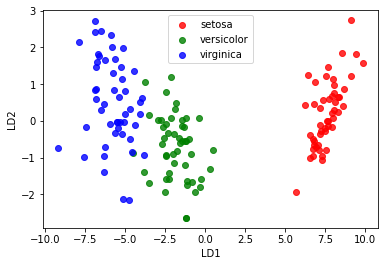

In [ ]:
#define data to plot
X = iris.data
y = iris.target
model = LinearDiscriminantAnalysis()
data_plot = model.fit(X, y).transform(X)
target_names = iris.target_names

#create LDA plot
plt.figure()
colors = ['red', 'green', 'blue']
lw = 2
for color, i, target_name in zip(colors, [0, 1, 2], target_names):
    plt.scatter(data_plot[y == i, 0], data_plot[y == i, 1], alpha=.8, color=color,
                label=target_name)

#add legend to plot
plt.legend(loc='best', shadow=False, scatterpoints=1)
plt.xlabel('LD1')
plt.ylabel('LD2')

#display LDA plot
plt.show()